# ROTATION OF AN IMAGE

enter the angle in degree= 30
enter the point space seprted about which you want to rotate= 0 0
(1111, 1219)


Text(0.5, 1.0, 'original image')

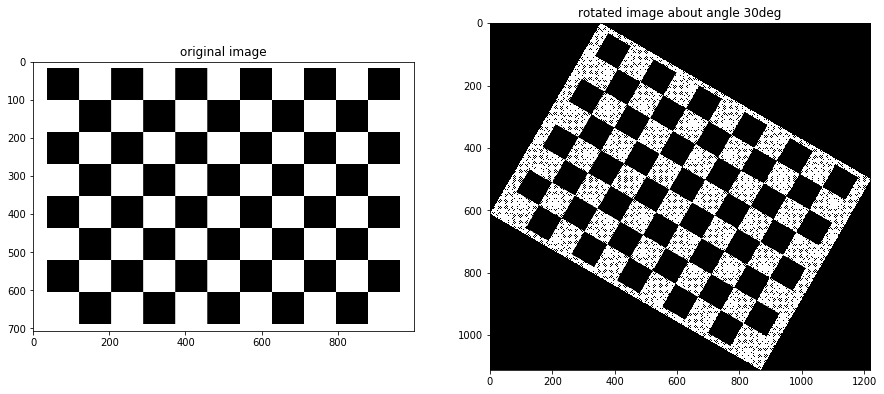

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
img=cv2.imread('C:/Users/Ankit/Desktop/computer vison/a4-checkerboard.png',0)
a=int(input('enter the angle in degree= '))
temp1=math.cos(math.radians(a))
temp2=math.sin(math.radians(a))
point=input('enter the point space seprted about which you want to rotate= ').split(' ')  
p1,p2=int(point[0]),int(point[1])
T=np.array([[temp1,-temp2,p1],[temp2,temp1,p2]])
x=[]
y=[]
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        temp=np.array([i-p1,j-p2,1])
        temp3=T.dot(temp)
        x.append(int(temp3[0]))
        y.append(int(temp3[1]))
img1=np.zeros((abs(min(x))+abs(max(x))+1,abs(min(y))+abs(max(y))+1),dtype=np.uint8)
arr1 = np.full(len(x), min(x))
arr2 = np.full(len(y), max(y))
xo=np.array(x)-arr1
yo=arr2-np.array(y)
count=0
print(img1.shape)
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        img1[xo[count],yo[count]]=img[i,j]
        count=count+1

plt.figure(figsize=(15,15))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title('rotated image about angle'+' '+str(a)+'deg')
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray') 
plt.title('original image')
        
        




# AFFINE TRANSFORM

enter the angle in degree= 30
enter the shear factor along x-axis and y-axis respectively with space seprated= 2 3
(2549, 2821)


Text(0.5, 1.0, 'original image')

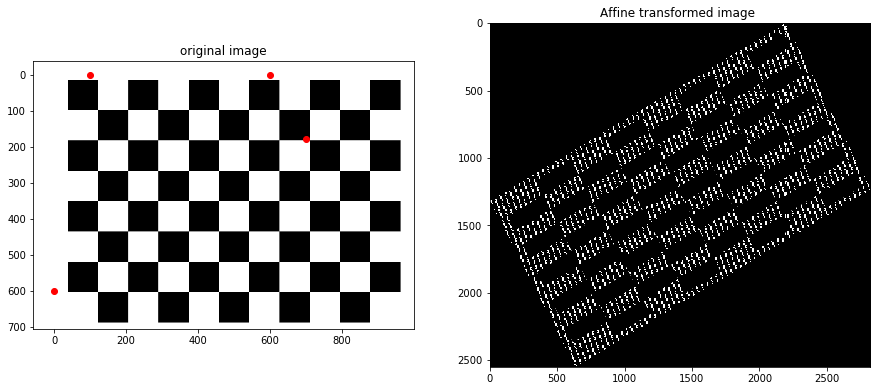

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
from numpy.linalg import inv
img=cv2.imread('C:/Users/Ankit/Desktop/computer vison/a4-checkerboard.png',0)
a=int(input('enter the angle in degree= '))
temp1=math.cos(math.radians(a))
temp2=math.sin(math.radians(a))
# point=input('enter the point space seprted about which you want to rotate= ').split(' ')  
# p1,p2=int(point[0]),int(point[1])
p1,p2=0,0
# scale=input('enter the scale factor along x-axis and y-axis respectively with space seprated= ').split(' ')
shear=input('enter the shear factor along x-axis and y-axis respectively with space seprated= ').split(' ')
T1=np.array([[temp1,-temp2,p1],[temp2,temp1,p2]])
# T2=np.array([[scale[0],0],[0,scale[1]]],dtype=np.float32)
T3=np.array([[1,shear[0]],[shear[1],1]],dtype=np.float32)
x=[]
y=[]
p=[]
q=[]
#print(T2,T3)
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        temp=np.array([i-p1,j-p2,1])
        temp3=T1.dot(temp)
        temp4=(T3).dot(temp3)
        x.append(int(temp4[0]))
        y.append(int(temp4[1]))
        p.append(i)
        q.append(j)
img1=np.zeros((abs(min(x))+abs(max(x))+1,abs(min(y))+abs(max(y))+1),dtype=np.uint8)
arr1 = np.full(len(x), min(x))
arr2 = np.full(len(y), max(y))
xo=np.array(x)-arr1
yo=arr2-np.array(y)
count=0
print(img1.shape)
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        img1[xo[count],yo[count]]=img[i,j]
        count=count+1
plt.figure(figsize=(15,15))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title('Affine transformed image ')
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray') 
plt.scatter(p[600],q[600],color='red')
plt.scatter(p[600000],q[600000],color='red')#,x[100],y[100],x[300],y[300]
plt.scatter(p[100000],q[100000],color='red')
plt.scatter(p[700180],q[700180],color='red')
plt.title('original image')

# estimation of affine metrix by selecting three non coleniar point in both original and mapped image

In [ ]:
x1,y1,x2,y2,x3,y3=x[100000],y[100000],x[600],y[600],x[600000],y[600000]
mat=np.array([[x1,y1,1,0,0,0],[0,0,0,x1,y1,1],[x2,y2,1,0,0,0],[0,0,0,x2,y2,1],[x3,y3,1,0,0,0],[0,0,0,x3,y3,1]],dtype=np.float32)      
po=np.array([p[100000],q[100000],p[600],q[600],p[600000],q[600000]]) 
invmat=inv(mat)  
para=(invmat.dot(po))
pi=np.array([[para[0],para[1],para[2]],[para[3],para[4],para[5]],[0,0,1]])
pi=inv(pi)
print('estimated affine metrix by selecting three non colenier point is= ')
print('_______________________________________________________________________________')
print(pi)
print('________________________________________________________________________________')

estimated affine metrix by selecting three non colenier point is= 
_______________________________________________________________________________
[[ 1.86599984  1.23266661 -0.5999913 ]
 [ 3.09799997 -0.632      -0.79998563]
 [ 0.          0.          1.        ]]
________________________________________________________________________________


Text(0.5, 1.0, 'image using estimated affine metrix ')

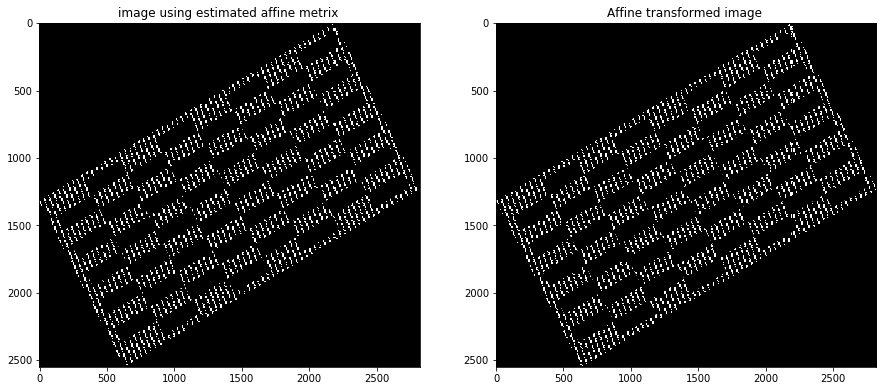

In [ ]:
invimg1=np.zeros((abs(min(x))+abs(max(x))+1,abs(min(y))+abs(max(y))+1),dtype=np.uint8)
x=[]
y=[]
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        temp=np.array([i,j,1])
        temp1=pi.dot(temp)
        x.append(int(temp1[0]))
        y.append(int(temp1[1]))
arr1 = np.full(len(x), min(x))
arr2 = np.full(len(y), max(y))
xo=np.array(x)-arr1
yo=arr2-np.array(y)
count=0
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        invimg1[xo[count],yo[count]]=img[i,j]
        count=count+1
plt.figure(figsize=(15,15))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title('Affine transformed image ')
plt.subplot(1,2,1)
plt.imshow(invimg1,cmap='gray') 
plt.title('image using estimated affine metrix ')

# HOMOGRAPHY TRANSFORM

enter the angle in degree= 0
enter the shear factor along x-axis and y-axis respectively with space seprated= 0 0
enter the homographic parameter a31,a32 = -.0003 .0001
(896, 1125)


Text(0.5, 1.0, 'original image')

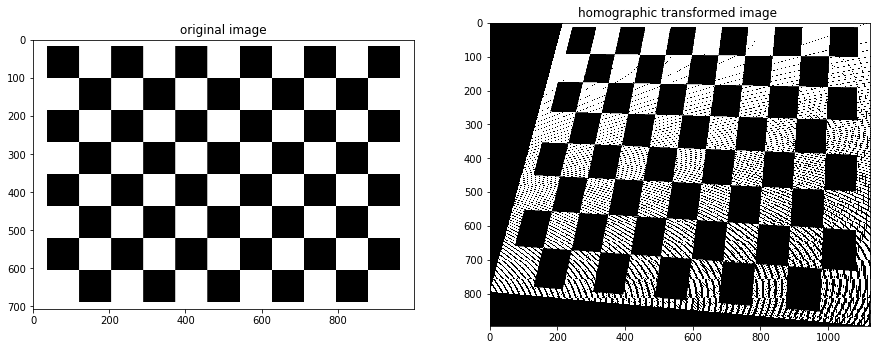

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
img=cv2.imread('C:/Users/Ankit/Desktop/computer vison/a4-checkerboard.png',0)
a=int(input('enter the angle in degree= '))
temp1=math.cos(math.radians(a))
temp2=math.sin(math.radians(a))
# point=input('enter the point space seprted about which you want to rotate= ').split(' ')  
# p1,p2=int(point[0]),int(point[1])
p1,p2=0,0
#scale=input('enter the scale factor along x-axis and y-axis respectively with space seprated= ').split(' ')
shear=input('enter the shear factor along x-axis and y-axis respectively with space seprated= ').split(' ')
hp=input('enter the homographic parameter a31,a32 = ').split(' ')
T1=np.array([[temp1,-temp2,p1],[temp2,temp1,p2],[0,0,1]])
#T2=np.array([[scale[0],0,0],[0,scale[1],0],[hp[0],hp[1],1]],dtype=np.float32)
T3=np.array([[1,shear[0],0],[shear[1],1,0],[hp[0],hp[1],1]],dtype=np.float32)
# T=np.array([[1.5*temp1,-temp2,p1],[temp2,.5*temp1,p2],[-1*.0002,0.0003,1]],dtype=np.float32)
x=[]
y=[]
#print(T2,T3)
p=[]
q=[]
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        temp=np.array([i-p1,j-p2,1])
#         temp4=T.dot(temp)
        temp3=T1.dot(temp)
        temp4=T3.dot(temp3)
        x.append(int((temp4[0])/temp4[2]))
        y.append(int((temp4[1])/temp4[2]))
        p.append(i)
        q.append(j)
img1=np.zeros((abs(min(x))+abs(max(x))+1,abs(min(y))+abs(max(y))+1),dtype=np.uint8)
arr1 = np.full(len(x), min(x))
arr2 = np.full(len(y), max(y))
xo=np.array(x)-arr1
yo=arr2-np.array(y)
count=0
print(img1.shape)
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        img1[xo[count],yo[count]]=img[i,j]
        count=count+1
        
        
        
plt.figure(figsize=(15,15))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title('homographic transformed image ')
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray') 
plt.title('original image')

# estimation of affine metrix by selecting three non coleniar point in both original and mapped image

In [ ]:
pm=np.array([x[100000],y[100000],x[600],y[600],x[600000],y[600000],x[700180],y[700180]])
x1,y1,x2,y2,x3,y3,x4,y4=p[100000],q[100000],p[600],q[600],p[600000],q[600000],p[700180],q[700180]
mat=np.array([[x1,y1,1,0,0,0,-x1*pm[0],-y1*pm[0]],
              [0,0,0,x1,y1,1,-x1*pm[1],-y1*pm[1]],
              [x2,y2,1,0,0,0,-x2*pm[2],-y2*pm[2]],
              [0,0,0,x2,y2,1,-x2*pm[3],-y2*pm[3]],
              [x3,y3,1,0,0,0,-x3*pm[4],-y3*pm[4]],
              [0,0,0,x3,y3,1,-x3*pm[5],-y3*pm[5]],
              [x4,y4,1,0,0,0,-x4*pm[6],-y4*pm[6]],
              [0,0,0,x4,y4,1,-x4*pm[7],-y4*pm[7]]],
             dtype=np.float32)      
invmat=inv(mat)  
para=(invmat.dot(pm))
pi=np.array([[para[0],para[1],para[2]],[para[3],para[4],para[5]],[para[6],para[7],1]])
print('estimated affine metrix by selecting three non colenier point is= ')
print('_______________________________________________________________________________')
print(pi)
print('________________________________________________________________________________')

estimated affine metrix by selecting three non colenier point is= 
_______________________________________________________________________________
[[ 1.00117268e+00  3.02319298e-04 -1.81393117e-01]
 [ 5.75432555e-17  9.97909001e-01 -4.36379349e-15]
 [-2.97486815e-04  9.64237925e-05  1.00000000e+00]]
________________________________________________________________________________


Text(0.5, 1.0, 'image using estimated homography metrix ')

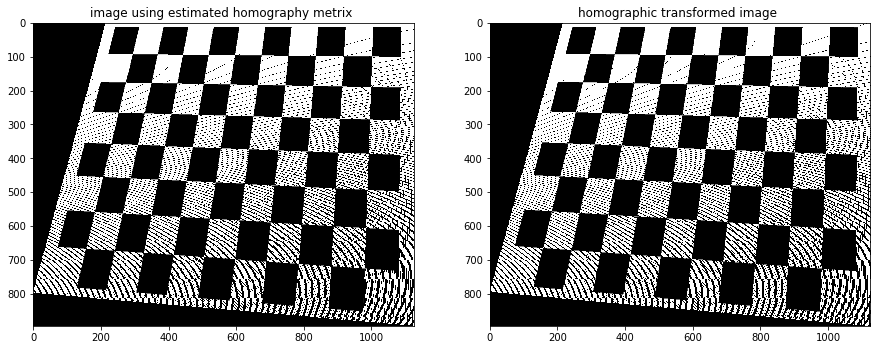

In [ ]:
invimg1=np.zeros((abs(min(x))+abs(max(x))+1,abs(min(y))+abs(max(y))+1),dtype=np.uint8)
x=[]
y=[]
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        temp=np.array([i,j,1])
        temp1=pi.dot(temp)
        x.append(int(temp1[0]/temp1[2]))
        y.append(int(temp1[1]/temp1[2]))
arr1 = np.full(len(x), min(x))
arr2 = np.full(len(y), max(y))
xo=np.array(x)-arr1
yo=arr2-np.array(y)
count=0
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        invimg1[xo[count],yo[count]]=img[i,j]
        count=count+1
plt.figure(figsize=(15,15))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title('homographic transformed image ')
plt.subplot(1,2,1)
plt.imshow(invimg1,cmap='gray') 
plt.title('image using estimated homography metrix ')